1. Встановлення та імпорт бібліотек


In [88]:
# Встановлення необхідних бібліотек (виконується один раз)
install.packages("arules")
install.packages("arulesViz")
install.packages("RColorBrewer")
install.packages("arulesViz")


Warning message:
"package 'arules' is in use and will not be installed"
Warning message:
"package 'arulesViz' is in use and will not be installed"
Warning message:
"package 'RColorBrewer' is in use and will not be installed"
Warning message:
"package 'arulesViz' is in use and will not be installed"


In [89]:
# Імпортуємо бібліотеки
library(arules)
library(arulesViz)
library(RColorBrewer)

2. Завантаження та опис набору даних


In [90]:
# Завантаження набору даних у формат транзакцій
dataset <- read.transactions("Market_Basket_Optimisation.csv",
                             sep = ",",
                             rm.duplicates = TRUE)

# Перегляд основної інформації про набір даних
summary(dataset)

distribution of transactions with duplicates:
1 
5 


transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 119 columns (items) and a density of 0.03288973 

most frequent items:
mineral water          eggs     spaghetti  french fries     chocolate 
         1788          1348          1306          1282          1229 
      (Other) 
        22405 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1754 1358 1044  816  667  493  391  324  259  139  102   67   40   22   17    4 
  18   19   20 
   1    2    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.914   5.000  20.000 

includes extended item information - examples:
             labels
1           almonds
2 antioxydant juice
3         asparagus

3. Візуалізація популярності товарів


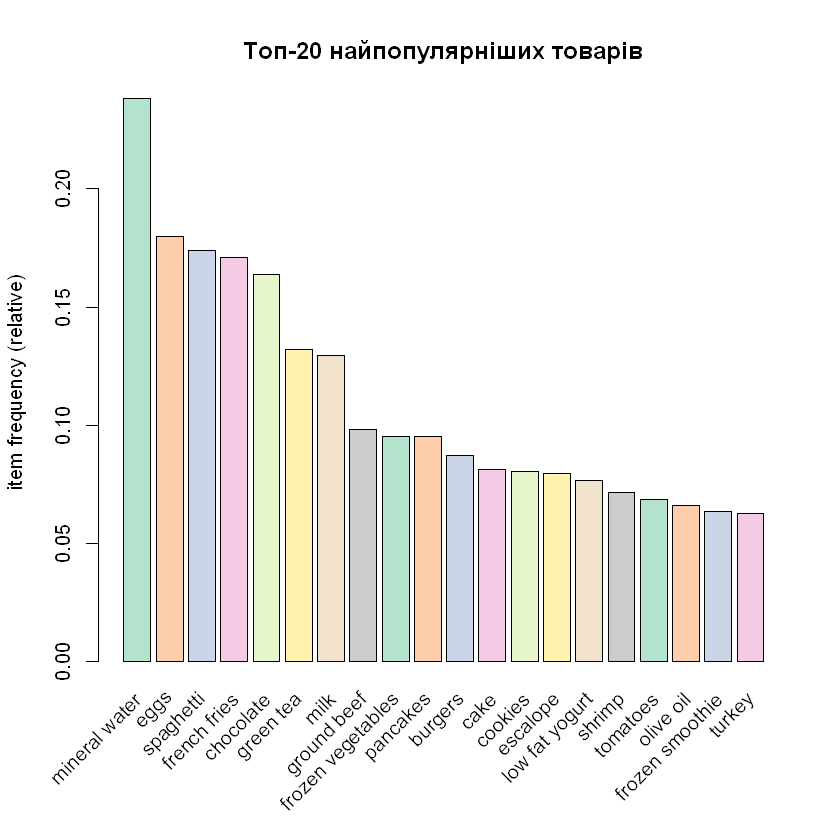

In [91]:
# Графік популярності товарів
itemFrequencyPlot(dataset, topN = 20, col = brewer.pal(8, "Pastel2"),
                  main = "Топ-20 найпопулярніших товарів")


4. Застосування алгоритму A-priori


In [92]:
# Налаштування параметрів та пошук асоціативних правил
associa_rules <- apriori(dataset, parameter =
                           list(supp = 0.001, conf = 0.8, minlen = 4))

# Виведення підсумку
summary(associa_rules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      4
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [116 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.04s].
writing ... [59 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 59 rules

rule length distribution (lhs + rhs):sizes
 4  5  6 
42 16  1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.000   4.000   4.000   4.305   5.000   6.000 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0.001067   Min.   :0.8000   Min.   :0.001067   Min.   : 3.356  
 1st Qu.:0.001067   1st Qu.:0.8000   1st Qu.:0.001200   1st Qu.: 3.432  
 Median :0.001067   Median :0.8333   Median :0.001333   Median : 3.776  
 Mean   :0.001216   Mean   :0.8521   Mean   :0.001433   Mean   : 4.704  
 3rd Qu.:0.001333   3rd Qu.:0.8889   3rd Qu.:0.001466   3rd Qu.: 4.848  
 Max.   :0.002133   Max.   :1.0000   Max.   :0.002533   Max.   :12.722  
     count       
 Min.   : 8.000  
 1st Qu.: 8.000  
 Median : 8.000  
 Mean   : 9.119  
 3rd Qu.:10.000  
 Max.   :16.000  

mining info:
    data ntransactions support confidence
 dataset          7501   0.001        0.8
                                                        

5. Аналіз отриманих правил


In [93]:
# Перегляд перших 10 правил
inspect(associa_rules[1:10])

     lhs                        rhs                 support confidence    coverage      lift count
[1]  {milk,                                                                                       
      spaghetti,                                                                                  
      strong cheese}         => {mineral water} 0.001066524  0.8000000 0.001333156  3.356152     8
[2]  {french fries,                                                                               
      mushroom cream sauce,                                                                       
      pasta}                 => {escalope}      0.001066524  1.0000000 0.001066524 12.606723     8
[3]  {mineral water,                                                                              
      pasta,                                                                                      
      shrimp}                => {eggs}          0.001333156  0.8333333 0.001599787  4.637117    10
[4]  {eggs

In [94]:
inspect(sort(associa_rules, by = "lift")[1:10])


     lhs                        rhs                     support confidence    coverage      lift count
[1]  {eggs,                                                                                           
      mineral water,                                                                                  
      pasta}                 => {shrimp}            0.001333156  0.9090909 0.001466471 12.722185    10
[2]  {french fries,                                                                                   
      mushroom cream sauce,                                                                           
      pasta}                 => {escalope}          0.001066524  1.0000000 0.001066524 12.606723     8
[3]  {chocolate,                                                                                      
      ground beef,                                                                                    
      milk,                                                              

6. Візуалізація асоціативних правил


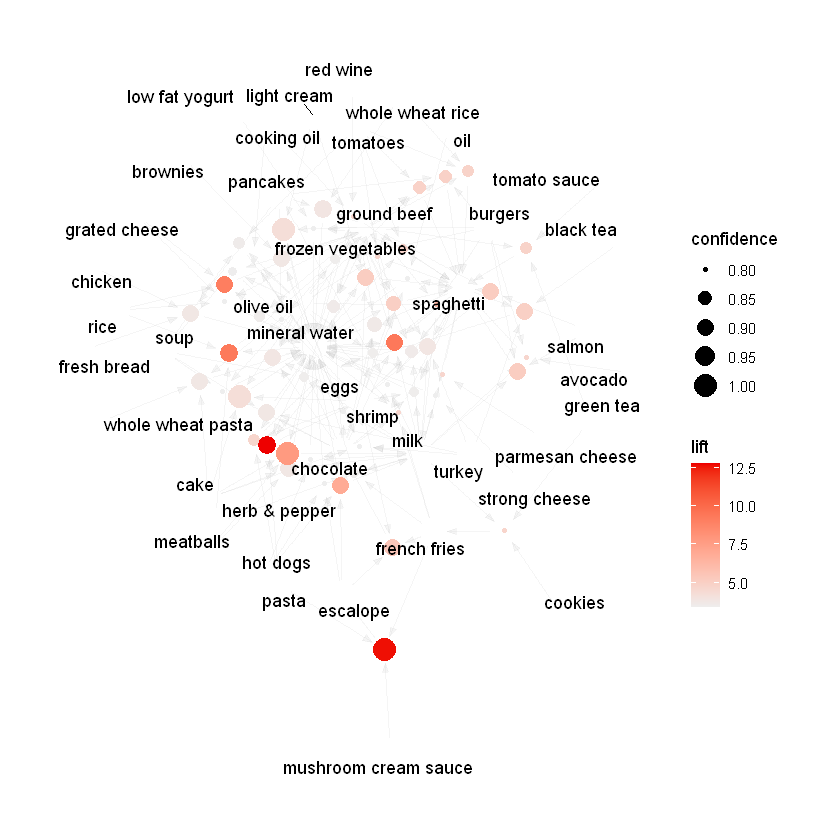

In [95]:
# Графічне представлення правил
plot(associa_rules, method = "graph", measure = "confidence", shading = "lift")

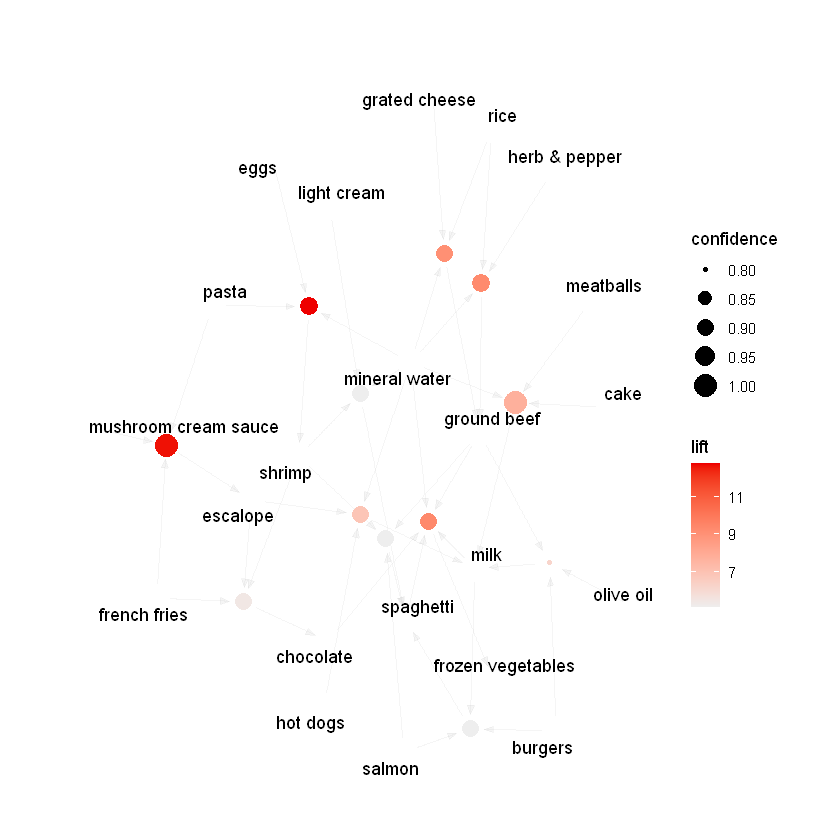

In [97]:
library(arulesViz)

# Subset rules with lift > 3
strong_rules <- subset(associa_rules, lift > 5)

# Plot with adjusted settings
plot(strong_rules, 
     method = "graph", 
     measure = "confidence", 
     shading = "lift",
     control = list(layout = "stress", circular = FALSE, max = 100))
